# **Angular correlation between quark-antiquark pairs**

Read data from files and compute the angle between the quark and antiquark pair.

In [1]:
import numpy as np
import os

folder = 'pb+pb_5020gev_su2_interp_pT_5.0'

current_path = os.getcwd() 
directory = current_path + '/results/' + folder + '/'

events = 10
nq = 15
ntp = 10

angles = []

for ev in range(1, events+1):
    for tp in range(1, ntp+1):
        for q in range(1, nq+1):

            file_name_q = 'ev_' + str(ev) + '_q_' + str(q) + '_tp_' + str(tp) + '.npz'
            file_path_q = directory + file_name_q
            data_q = np.load(file_path_q)
            index_q = 0
            pT_q = [data_q['pmu'][index_q, 1], data_q['pmu'][index_q, 2]]

            file_name_aq = 'ev_' + str(ev) + '_aq_' + str(q) + '_tp_' + str(tp) + '.npz'
            file_path_aq = directory + file_name_aq
            data_aq = np.load(file_path_aq)
            index_aq = 0
            pT_aq = [data_aq['pmu'][index_aq, 1], data_aq['pmu'][index_aq, 2]]

            file_name_q = 'ev_' + str(ev) + '_q_' + str(q) + '_tp_' + str(tp) + '.npz'
            file_path_q = directory + file_name_q
            data_q = np.load(file_path_q)
            index_q = len(data_q['pmu'][:, 0]) - 1
            pT_q = [data_q['pmu'][index_q, 1], data_q['pmu'][index_q, 2]]

            file_name_aq = 'ev_' + str(ev) + '_aq_' + str(q) + '_tp_' + str(tp) + '.npz'
            file_path_aq = directory + file_name_aq
            data_aq = np.load(file_path_aq)
            index_aq = len(data_aq['pmu'][:, 0]) - 1
            pT_aq = [data_aq['pmu'][index_aq, 1], data_aq['pmu'][index_aq, 2]]

            unit_vector_pT_q = pT_q / np.linalg.norm(pT_q)
            unit_vector_pT_aq = pT_aq / np.linalg.norm(pT_aq)
            dot_product = np.dot(unit_vector_pT_q, unit_vector_pT_aq)
            angle = np.arccos(dot_product) * 180 / np.pi
            # angle = np.arccos(dot_product)
            angles.append(angle)

Plot the results.

Text(0.05, 0.95, '$p_T=5\\,\\mathrm{GeV}$\n$\\tau_\\mathrm{form}=0.06\\,\\mathrm{fm/c}$')

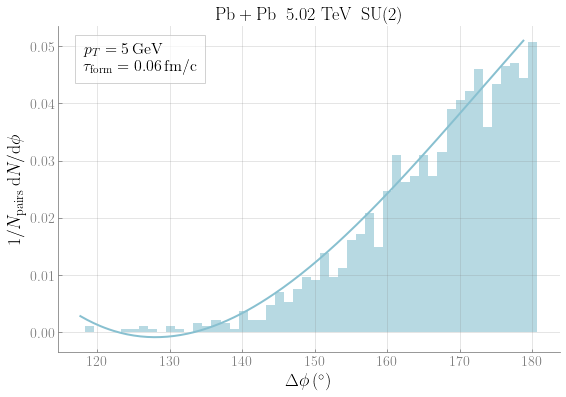

In [4]:
from matplotlib import pyplot as plt
from scipy.interpolate import splev, splrep

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (9, 6)
plt.rcParams.update({'font.size':14})

fig = plt.figure()
ax = plt.subplot(111)
plt.title(r'$\mathrm{Pb+Pb}\,\,\, 5.02\,\,\mathrm{TeV}\,\,\,\mathrm{SU(2)}$', size = 18)
plt.ylabel(r'$1/N_\mathrm{pairs}\,\mathrm{d}N/\mathrm{d}\phi$', size = 18)
plt.xlabel(r'$\Delta\phi\,(^\circ)$', size = 18)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray') 
ax.tick_params(direction='in', colors='gray',grid_color='gray', grid_alpha=0.5)

plt.grid(color = 'gray', linestyle = '-', linewidth = 1, alpha=0.2)

nbins = 50
density, bins = np.histogram(angles, bins=nbins, density=True)
widths = bins[:-1] - bins[1:]
plt.bar(bins[1:], density, width=widths, alpha=0.6, color='#88C0D0')

x = bins[:-1]
y = density

# Interpolation
spl = splrep(x, y, s=0.01, per=False)
x2 = np.linspace(x[0], x[-1], 200)
y2 = splev(x2, spl)
plt.plot(x2, y2, color='#88C0D0', linewidth = 2.0)

textstr = '\n'.join((
    r'$p_T=5\,\mathrm{GeV}$',
    r'$\tau_\mathrm{form}=0.06\,\mathrm{fm/c}$',
    ))
props = dict(boxstyle='square', facecolor='white', alpha=0.7, edgecolor='silver', pad=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)

# plt.savefig('dndphi_' + folder + '.png', dpi = 300)